In [1]:
%pip install pandas
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

# Load the data from the provided JSON file
file_path = '~/Desktop/appEvents.json'
data = pd.read_json(file_path)

# Displaying the first few rows to understand the structure of the data
data.head()


,uuid,type,a,b,op,createdAt,isCorrect,correctAnswer,userAnswer,responseTimeMs
0,abd59189-93ca-42b3-8a04-c8eda3f5df8f,GENERATE,2,8,*,1703486944386,NaN,NaN,NaN,NaN
1,7e377192-2586-47a6-a3c5-1654f78c005a,SUBMIT,2,8,*,1703486948402,1.0,16.0,16.0,4016.0
2,9f5aa6c6-23ab-464e-a917-b01623beea49,GENERATE,10,3,*,1703486948402,NaN,NaN,NaN,NaN
3,d49677c1-4095-4c99-946f-4656507660be,SUBMIT,10,3,*,1703486953013,1.0,30.0,30.0,4611.0
4,65b2173b-e1f3-405b-a655-f0a19c462e55,GENERATE,1,6,*,1703486953013,NaN,NaN,NaN,NaN


In [3]:
# Filtering the data for SUBMIT events to analyze correctness
submit_events = data[data['type'] == 'SUBMIT']

# Grouping data by operation and the numbers involved, then calculating the correctness rate
problem_grouped = submit_events.groupby(['op', 'a', 'b']).agg(
    total_attempts=pd.NamedAgg(column='isCorrect', aggfunc='count'),
    correct_attempts=pd.NamedAgg(column='isCorrect', aggfunc='sum')
)

# Calculating the percentage of incorrect attempts
problem_grouped['incorrect_percentage'] = (1 - (problem_grouped['correct_attempts'] / problem_grouped['total_attempts'])) * 100

# Sorting by incorrect percentage in descending order to find the most problematic types
most_problematic_problems = problem_grouped.sort_values(by='incorrect_percentage', ascending=False)

most_problematic_problems.head(10)  # Displaying the top 10 problematic problem types

total_attempts  correct_attempts  incorrect_percentage
op a b                                                        
*  8 7              24               7.0             70.833333
     4               3               1.0             66.666667
   7 4               9               5.0             44.444444
   4 7               8               5.0             37.500000
   8 6               3               2.0             33.333333
   4 9               7               5.0             28.571429
   3 7               4               3.0             25.000000
   6 5               4               3.0             25.000000
     7               4               3.0             25.000000
     9               4               3.0             25.000000

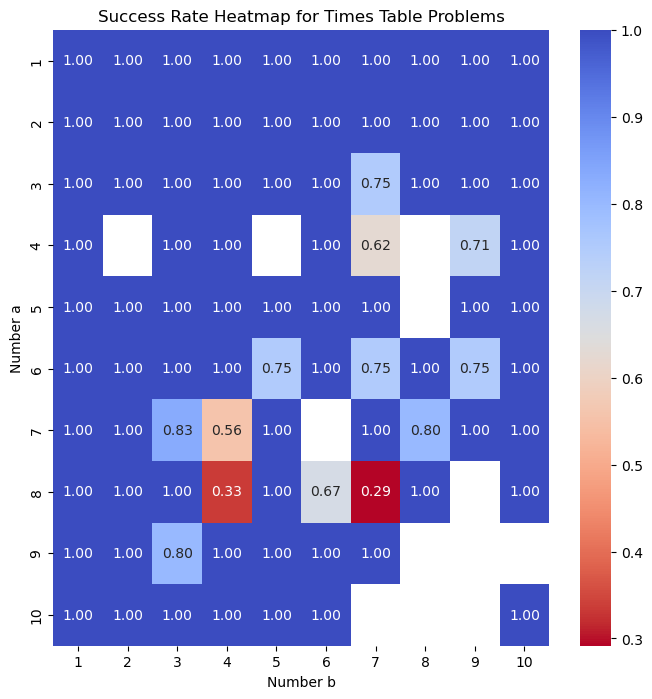

In [4]:
import numpy as np
import seaborn as sns

# Filtering data for multiplication problems
multiplication_data = submit_events[submit_events['op'] == '*']

# Creating a pivot table for the success rate of each times table problem
pivot_table = multiplication_data.pivot_table(
    values='isCorrect',
    # values='responseTimeMs',
    index='a',
    columns='b',
    aggfunc=np.mean  # Calculating the success rate (mean of isCorrect)
)

# Creating the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm_r', fmt='.2f')
plt.title('Success Rate Heatmap for Times Table Problems')
plt.xlabel('Number b')
plt.ylabel('Number a')
plt.show()


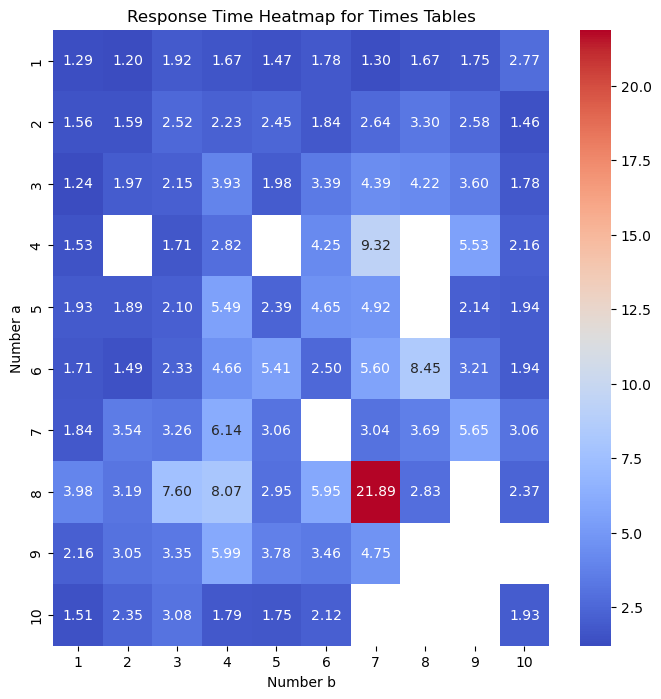

In [5]:
# Dividing response time by 1000 to get seconds
multiplication_data['responseTimeSec'] = multiplication_data['responseTimeMs'] / 1000

# Creating a pivot table for the success rate of each times table problem
response_time_pivot_table = multiplication_data.pivot_table(
    values='responseTimeSec',
    index='a',
    columns='b',
    aggfunc=np.mean  # Calculating the success rate (mean of responseTimeSec)
)

# Creating the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(response_time_pivot_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Response Time Heatmap for Times Tables')
plt.xlabel('Number b')
plt.ylabel('Number a')
plt.show()
